# Covid effect study on product mix sales
**Project indends to investigate the COVID 19 crisis effect in customers purchase patterns**

In [66]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


In [67]:
products_2019 = pd.read_excel('Covid_products_study_2019.xlsx')

In [68]:
products_2019.head()

,Cuscode,Domestic,Basket_2019
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001..."
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000..."


In [69]:
local = products_2019[products_2019["Domestic"] == 1]

In [5]:
local

,Cuscode,Domestic,Basket_2019
8,A.00061,1,"0025008012, 0104019000, 0195000000"
9,A.00071,1,"0010005001, 0015020000, 0025006000, 0025017001..."
10,A.00078,1,"0005001006, 0010006001, 0025006000, 0025006010..."
11,A.00081,1,0010005001
12,A.00093,1,"0010003001, 0010005001, 0015005003, 0015027000..."
...,...,...,...
2834,L.00170,1,0003001000
2835,L.00183,1,0135008000
2836,L.00184,1,"0010007001, 0017001002, 0025006000, 0025006010..."
2837,L.00185,1,"0032000014, 0115005009, 0150003000"


In [70]:
products_2020 = pd.read_excel('Covid_products_study_2020.xlsx')

In [71]:
products_2020.head()

,Cuscode,Domestic,Basket_2020
0,A.00001,0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0015027000, 0015042001, 0025006000, 0025006010..."


In [72]:
products_total = pd.merge(products_2019, products_2020, on=["Cuscode"])

In [73]:
products_total.shape

(2154, 5)

In [74]:
products_total.info

<bound method DataFrame.info of       Cuscode  Domestic_x                                        Basket_2019  \
0     A.00001           0  0015027000, 0018007003, 0025006010, 0025006011...   
1     A.00008           0  0025022020, 0094013002, 0094079001, 0095004000...   
2     A.00023           0                                         0005001010   
3     A.00028           0  0001026020, 0015035000, 0068001001, 0105003001...   
4     A.00032           0  0009001002, 0015027000, 0015042001, 0025006000...   
...       ...         ...                                                ...   
2149  L.00166           1                                         0095005000   
2150  L.00170           1                                         0003001000   
2151  L.00183           1                                         0135008000   
2152  L.00184           1  0010007001, 0017001002, 0025006000, 0025006010...   
2153  L.00185           1                 0032000014, 0115005009, 0150003000   

      D

In [75]:
products_total.head()

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011...",0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000...",0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001...",0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000...",0,"0015027000, 0015042001, 0025006000, 0025006010..."


## Similarity metrics . Implement SequenceMatcher and Jaccard similarity methods


In [13]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [44]:
round(similar(products_total["Basket_2019"][4], products_total["Basket_2020"][4]),2)

0.86

In [45]:
import numpy as np

def jaccard(str1, str2) :
    list1 = str1.split(", ")
    list2 = str2.split(", ")
    #print(list1)
    intersection = len(list(set(list1).intersection(list2)))
    #print(intersection)
    union = (len(list1) + len(list2)) - intersection
    #print(union)
    return float(intersection) / union


#jaccard(["0015027000", "0018007003", "0025006010", "0025006011"], ["0015027000","0025006011"])
round(jaccard(products_total["Basket_2019"][4], products_total["Basket_2020"][4]),2)

0.67

In [16]:
products_total.reset_index(drop = True)

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011...",0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000...",0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001...",0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000...",0,"0015027000, 0015042001, 0025006000, 0025006010..."
...,...,...,...,...,...
2149,L.00166,1,0095005000,1,0095005000
2150,L.00170,1,0003001000,1,0003001000
2151,L.00183,1,0135008000,1,"0135000000, 0135008000"
2152,L.00184,1,"0010007001, 0017001002, 0025006000, 0025006010...",1,"0010003001, 0010005001, 0015027000, 0018013001..."


In [46]:
products_total["Basket_2020"][1:4]

1    0025022020, 0094013002, 0094079001, 0095004000...
2                                           0005001010
3       0001026020, 0015035000, 0068001001, 0135000000
Name: Basket_2020, dtype: object

In [47]:
for i in range (1,10) :
     print(similar(products_total["Basket_2019"][i], products_total["Basket_2020"][i]))
     print(jaccard(products_total["Basket_2019"][i], products_total["Basket_2020"][i]))
     print('____________________')

0.9210526315789473
0.8571428571428571
____________________
1.0
1.0
____________________
0.6571428571428571
0.5
____________________
0.8559322033898306
0.6666666666666666
____________________
0.847457627118644
0.6666666666666666
____________________
1.0
1.0
____________________
0.8536585365853658
0.75
____________________
0.6875
0.35714285714285715
____________________
0.7711864406779662
0.42857142857142855
____________________


In [48]:
sim_sim = []
sim_jac = []
for i in range (len(products_total)):
    sim_sim_t = similar(products_total["Basket_2019"][i], products_total["Basket_2020"][i])
    sim_sim.append(sim_sim_t)
    sim_jac_t = jaccard(products_total["Basket_2019"][i], products_total["Basket_2020"][i])
    sim_jac.append(sim_jac_t)

In [49]:
sim_data = pd.DataFrame(sim_sim)
jac_data = pd.DataFrame(sim_jac)

In [50]:
sim_data.rename(columns={0: "Similarity"}, inplace = True)
jac_data.rename(columns={0: "Jaccard"}, inplace = True)

In [51]:
sim_data['Jaccard'] = jac_data['Jaccard']
sim_data

,Similarity,Jaccard
0,0.889831,0.666667
1,0.921053,0.857143
2,1.000000,1.000000
3,0.657143,0.500000
4,0.855932,0.666667
...,...,...
2149,1.000000,1.000000
2150,1.000000,1.000000
2151,0.625000,0.500000
2152,0.798387,0.312500


In [52]:
avg_sim = sim_data.Similarity.mean(axis=0)
avg_jac = sim_data.Jaccard.mean(axis=0)

print(avg_sim)
print(avg_jac)

0.6838582975737337
0.4502697556233573


In [53]:
max_sim = sim_data.Similarity.max(axis=0)
max_jac = sim_data.Jaccard.max(axis=0)

print(max_sim)
print(max_jac)

1.0
1.0


In [54]:
min_sim = sim_data.Similarity.min(axis=0)
min_jac = sim_data.Jaccard.min(axis=0)

print(min_sim)
print(min_jac)

0.08152173913043478
0.0


In [79]:
stdv_sim = sim_data.Similarity.std(axis=0)
stdv_jac = sim_data.Jaccard.std(axis=0)

print(stdv_sim)
print(stdv_jac)

0.20929213733285942
0.2835066763709561


array([[<AxesSubplot:title={'center':'Similarity'}>,
        <AxesSubplot:title={'center':'Jaccard'}>]], dtype=object)

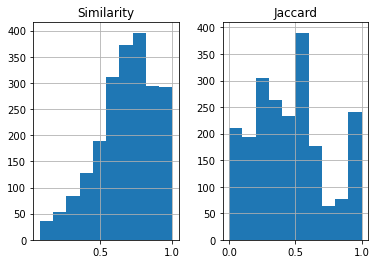

In [76]:
sim_data.hist()

* It is obvious that the two methods provide differenct results and  shapes. Subject will be analyzed further.

**Read the master file of customers**

In [28]:
customer_base = pd.read_excel('Customer_profile.xlsx', sheet_name='customers_profile_2021')
customer_base.tail()

,CardCode,CustomerRank,Domestic,Attika,Territory,U_GRSL,U_ZeeKey2,SZSegmentation,MarketSegmentation,Subsegment,SlpCode,AvgPayDays,PaymentTerms,AvgLatePayDays,Tziros,AvgSVal,MaxSval,invNo,AvgInvNoPerMonth,Basket
2482,L.00203,1424,1,1,108,11.0,2,c,C,1,140,32.51,30,3,838.23,39.92,209.50,21,1,"0129000001, 0025006000, 0135000000, 0025017001..."
2483,L.00205,1267,1,1,108,2.0,2,c,C,1,140,69.68,30,40,1072.73,59.60,135.80,18,2,"0127010000, 0025017001, 0017001002, 0010008001..."
2484,L.00206,2153,1,1,108,1.0,2,c,B,2,140,96.25,62,34,222.58,74.19,95.56,3,3,"0026008002, 0094083001, 0094084000"
2485,L.00207,1080,1,1,108,1.0,2,c,B,2,140,19.37,62,-43,1460.91,63.52,301.46,23,2,"0196001005, 0094083001, 0196001001, 0196000003..."
2486,L.00209,764,1,1,108,8.0,2,b,B,4,140,0.00,62,-62,2566.35,285.15,1950.09,9,4,"0025014000, 0041002001, 0041003001, 0015019000..."


In [56]:
customer_data = customer_base[["CardCode","Domestic","Attika", "SZSegmentation"]]

In [57]:
customer_data.rename(columns={'CardCode':'Cuscode'}, inplace=True)

C:\Users\netadmin\Anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [58]:
customer_data.head()

,Cuscode,Domestic,Attika,SZSegmentation
0,A.00001,0,1,NaN
1,A.00008,0,1,NaN
2,A.00023,0,1,NaN
3,A.00028,0,1,NaN
4,A.00032,0,1,NaN


In [59]:
customers_combined = pd.merge(products_total, customer_data, on=["Cuscode"])

In [60]:
customers_combined.tail()

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020,Domestic,Attika,SZSegmentation
1821,L.00153,1,"0025006000, 0025006011",1,"0010005001, 0025006000, 0025006003, 0025006011",1,1,b
1822,L.00157,1,"0001016000, 0004001001, 0010005001, 0032000000...",1,"0001016000, 0004001001, 0009001008, 0025006000...",1,1,b
1823,L.00160,1,0009001008,1,"0001016000, 0009001003, 0009001008, 0010005001",1,1,c
1824,L.00161,1,"0026008002, 0094093000, 0110020001, 0110022001...",1,"0015027000, 0025006080, 0026008002, 0064001003...",1,1,b
1825,L.00184,1,"0010007001, 0017001002, 0025006000, 0025006010...",1,"0010003001, 0010005001, 0015027000, 0018013001...",1,1,a


In [61]:
customers_c = customers_combined[customers_combined["SZSegmentation"] == "c"]

In [62]:
customers_c = customers_c[["Cuscode", "Basket_2019", "Basket_2020"]]



In [63]:
customers_c.head()

,Cuscode,Basket_2019,Basket_2020
8,A.00071,"0010005001, 0015020000, 0025006000, 0025017001...","0001016000, 0025006000, 0025006003, 0025017001..."
10,A.00093,"0010003001, 0010005001, 0015005003, 0015027000...","0010002001, 0010005001, 0025006000, 0094089002..."
11,A.00095,"0004001001, 0025006012, 0025017001, 0095004000...","0004001001, 0025006070, 0025006080, 0025017001..."
13,A.00108,"0025006000, 0025006003, 0025017001, 0095004000...","0025006000, 0025017001, 0095004000"
16,A.00115,"0010005001, 0026018001","0026018001, 0118007001"


In [64]:
customers_c = customers_c.reset_index()


In [65]:
customers_c.head()

,index,Cuscode,Basket_2019,Basket_2020
0,8,A.00071,"0010005001, 0015020000, 0025006000, 0025017001...","0001016000, 0025006000, 0025006003, 0025017001..."
1,10,A.00093,"0010003001, 0010005001, 0015005003, 0015027000...","0010002001, 0010005001, 0025006000, 0094089002..."
2,11,A.00095,"0004001001, 0025006012, 0025017001, 0095004000...","0004001001, 0025006070, 0025006080, 0025017001..."
3,13,A.00108,"0025006000, 0025006003, 0025017001, 0095004000...","0025006000, 0025017001, 0095004000"
4,16,A.00115,"0010005001, 0026018001","0026018001, 0118007001"


In [39]:
result_c = []
for i in range (len(customers_c)):
    result_t = similar(customers_c["Basket_2019"][i], customers_c["Basket_2020"][i])
    result_c.append(result_t)

In [40]:
result_data_c = pd.DataFrame(result_c)
result_data_c.head()

,0
0,0.687500
1,0.670732
2,0.780000
3,0.739130
4,0.454545


In [42]:
avg_c =result_data_c[[0]].mean(axis=0)
print(avg_c)

0    0.667554
dtype: float64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

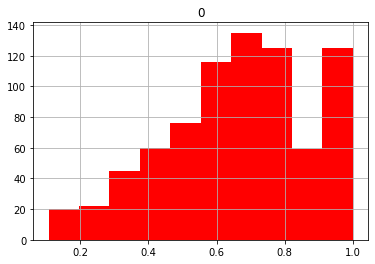

In [43]:
result_data_c.hist([0], color = "red")